##Clustering customers into groups using ML for subsequent targeted marketing. 
#Use KMeans algorithm and Agglomerative clustering. 
#Identify the best number of clusters.

#import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#load data 

In [21]:
df=pd.read_csv('Wholesale customers data.csv')

In [3]:
df.head(500)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


#There are a total of 440 observations and 8 attributes in the dataset. 
#As we can see, every features have 440 non-null .That means  there are no missing Values

## printing the number of null values in each attribute

In [5]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#printing the number of UNIQUE values in each attribute

In [7]:
df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

#continuous features-fresh,milk,grocery,frozen,detergent_paper,delicasen
#categorical features-channel,region

In [22]:
x=df.drop(['Channel','Region'],axis=1)

#take preprocessing measures for Channel, Region columns because they are not helpful when we model our data so, the easiest way is just drop those columns

In [23]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


# Scaling Methods must scale them before features are supplied to clustering methods like K-means. 
#Because Euclidean Distance is used to build cohorts in clustering algorithms, it's good to scale variables with heights in meters and weights in kilograms before computing the distance.

In [24]:
from sklearn.preprocessing import MinMaxScaler
ms= MinMaxScaler()
x = ms.fit_transform(x)
pd.DataFrame(x).head()

,0,1,2,3,4,5
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


#k means clustering

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(x)

KMeans(n_clusters=4, random_state=0)

In [36]:
pred_y = kmeans.fit_predict(x)

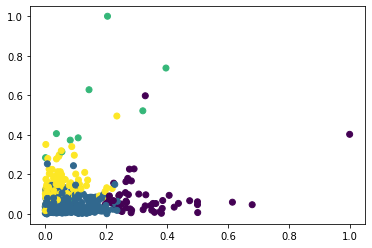

In [37]:
plt.scatter(x[:,0],x[:,1],c=pred_y)

cluster 1 Inertia 24.924244504665523
cluster 2 Inertia 17.24540576426056
cluster 3 Inertia 13.878391698659025
cluster 4 Inertia 10.76666039838505
cluster 5 Inertia 9.06306563714591
cluster 6 Inertia 7.9652589386433
cluster 7 Inertia 7.2600513801861535
cluster 8 Inertia 6.595048430245054
cluster 9 Inertia 5.918651133643229
cluster 10 Inertia 5.509069571110718
cluster 11 Inertia 5.070280741063063
cluster 12 Inertia 4.61504027625937
cluster 13 Inertia 4.3709913903247255
cluster 14 Inertia 4.04038458195342
cluster 15 Inertia 3.850773184807125
cluster 16 Inertia 3.6245168508318715
cluster 17 Inertia 3.408919992258868
cluster 18 Inertia 3.2082027657648378
cluster 19 Inertia 2.989395092002874


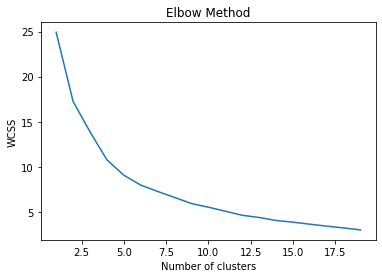

In [38]:
wcss = [] #Within Cluster Sum of Squares (WCSS)
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    print('cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
y1 = pd.DataFrame(kmeans.labels_)
y1.value_counts()

5     126
1      73
18     60
4      44
16     33
11     28
3      23
0      22
6      10
17      7
2       5
8       2
7       1
10      1
12      1
13      1
14      1
15      1
9       1
dtype: int64

##We can see that 4th cluster has maximum number of samples

#agglomerative clustering

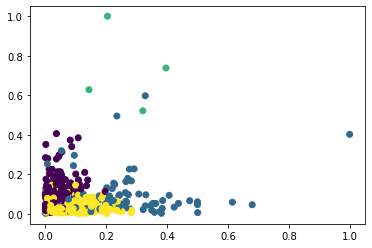

In [43]:
from sklearn.cluster import AgglomerativeClustering
ac2 = AgglomerativeClustering(n_clusters = 4)
ac2.fit(x)
pred_y = ac2.fit_predict(x)
plt.scatter(x[:,0],x[:,1],c=pred_y)

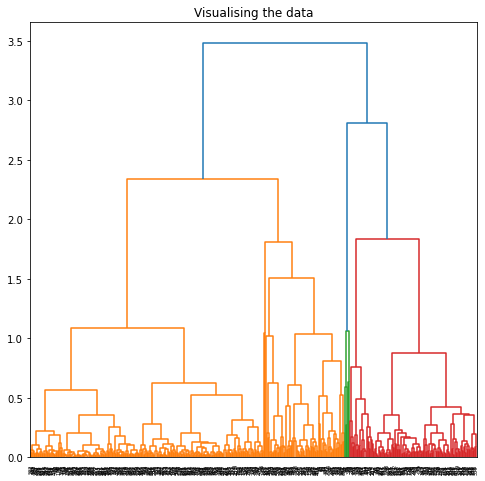

In [45]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(x, method ='ward')))

In [47]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

In [48]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for i in range(2, 8):
    Agg = AgglomerativeClustering(n_clusters = i)
    Agg.fit(x)
    score = silhouette_score(x, Agg.labels_)
    silhouette_coefficients.append(score)

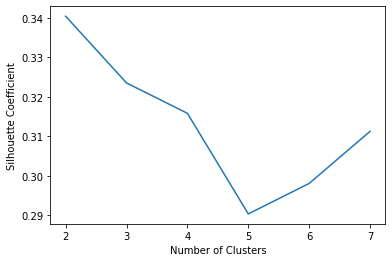

In [52]:
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

#Agglomerative Clustering gave me three Clustering as you can see from above diagram. It is nicely divided into three groups.